In [ ]:
from scipy.io import loadmat       # Import function to read data.
from pylab import *                # Import numerical and plotting functions
from IPython.lib.display import YouTubeVideo  # Enable YouTube videos
rcParams['figure.figsize']=(12,3)  # Change the default figure size
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/Data/Python EEG/Case-Studies-Python-student')
from my_module import ERP             # A function written by the author to compute the ERP

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


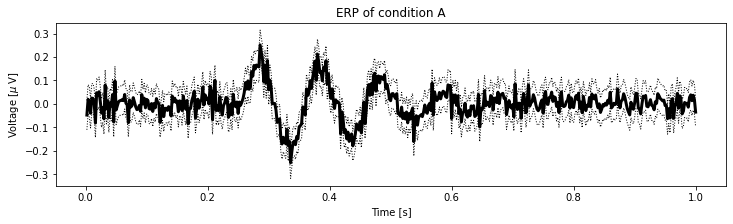

In [ ]:


data = loadmat("/content/gdrive/MyDrive/Colab Notebooks/Data/Python EEG/Case-Studies-Python-student/matfiles/02_EEG-1.mat")                # Load the data,
EEGa = data['EEGa']                             # ... and get the EEG from one condition,
t = data['t'][0]                                # ... and a time axis,
ntrials = len(EEGa)                             # ... and compute the number of trials.

mn = EEGa.mean(0)                               # Compute the mean signal across trials (the ERP).
sd = EEGa.std(0)                                # Compute the std of the signal across trials.
sdmn = sd / sqrt(ntrials)                       # Compute the std of the mean.

plot(t, mn, 'k', lw=3)                          # Plot the ERP of condition A,
plot(t, mn + 2 * sdmn, 'k:', lw=1)              # ... and include the upper CI,
plot(t, mn - 2 * sdmn, 'k:', lw=1)              # ... and the lower CI.
xlabel('Time [s]')                              # Label the axes,
ylabel('Voltage [$\mu$ V]')
title('ERP of condition A')                     # ... provide a useful title,
show()                                          # ... and show the plot.

# Background





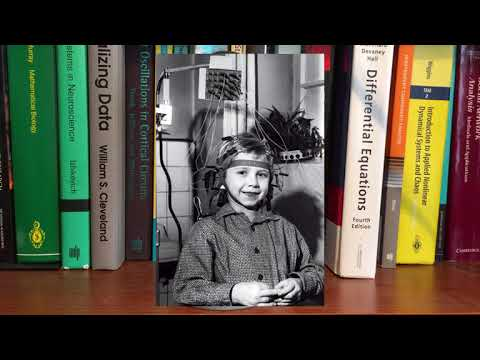

In [ ]:
YouTubeVideo('Cy_BF7smAkk') # https://www.youtube.com/watch?v=Cy_BF7smAkk

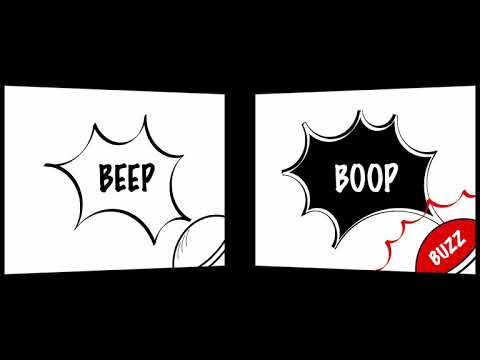

In [ ]:
YouTubeVideo('q2-DjvPRaNA') # https://www.youtube.com/watch?v=q2-DjvPRaNA&feature=emb_title

# Data Analysis

In [ ]:
data.keys()

# EEGa to condition A and EEGb to condition B. 
# t for time

dict_keys(['__header__', '__version__', '__globals__', 'EEGa', 'EEGb', 't'])

In [ ]:
# Extracting the data
EEGa = data['EEGa']
EEGb = data['EEGb']
t = data['t'][0]

In [ ]:
# Describing t 
print(data['t'].shape)
print(t.shape)
print(len(data['t']))
print(len(data['t'][0]))

(1, 500)
(500,)
1
500


In [ ]:
# Extract number of trials
# In the data EEGa and EEGb each row corresponds to a separate trial, and each column to a point in time. There are 1000 trials and each trial has 500 time points
ntrials, nsamples = EEGa.shape

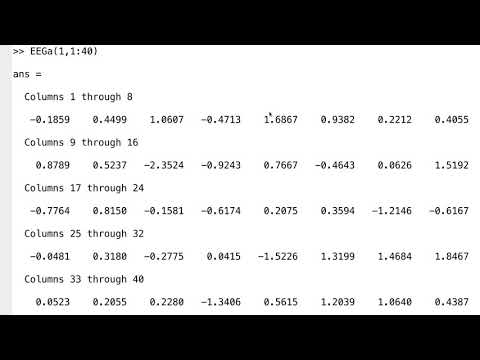

In [ ]:
YouTubeVideo('uSjd41G-yNY') # https://www.youtube.com/watch?v=uSjd41G-yNY


In [ ]:
print( EEGa[0,:40] )

[-0.18590963  0.44987601  1.06070801 -0.47126525  1.68669327  0.93822134
  0.22120704  0.40549128  0.87887967  0.52369783 -2.35240678 -0.92434588
  0.7666718  -0.464255    0.06259532  1.51917029 -0.77640081  0.81498874
 -0.15813729 -0.61740252  0.20750639  0.35943087 -1.21455008 -0.61671545
 -0.0481362   0.31798269 -0.27745959  0.04148398 -1.52257779  1.31993666
  1.46836023  1.846661    0.0523164   0.20551538  0.22799468 -1.34063464
  0.56145165  1.20391968  1.06398658  0.43874824]


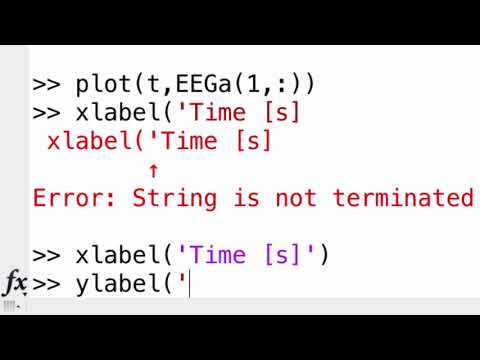

In [ ]:
YouTubeVideo('9qx29zDxcAc') # https://www.youtube.com/watch?v=9qx29zDxcAc

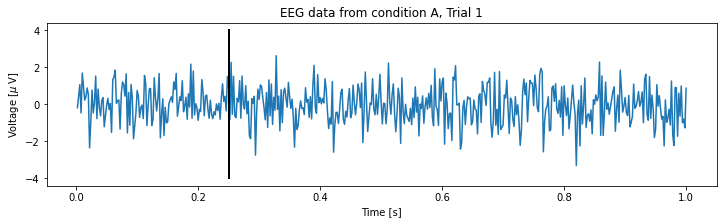

In [ ]:
plot(t, EEGa[0,:])                   # Plot condition A, trial 1 data vs t.
xlabel('Time [s]')                   # Label the x-axis as time.
ylabel('Voltage [$\mu$ V]')          # Label the y-axis as voltage.
title('EEG data from condition A, Trial 1')  # Add a title

# Add a vertical line to indicate the stimulus time
plot([0.25, 0.25], [-4,4], 'k', lw=2)
show()

In [ ]:
dt = t[1] - t[0]  # Determine the sampling interval
dt

0.002

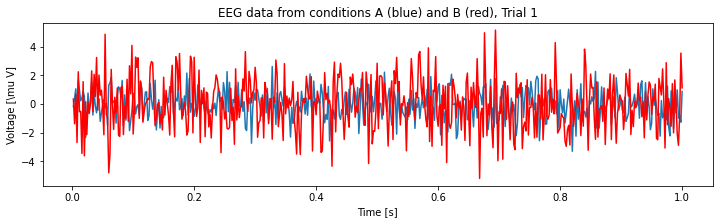

In [ ]:
figure(figsize=(12, 3))     # Resize the figure to make it easier to see
plot(t,EEGa[0])                 # Plot condition A, trial 1, data vs t,
plot(t,EEGb[0], 'r')            # ... and the data from condition B, trial 1,
xlabel('Time [s]')              # Label the x-axis as time.
ylabel('Voltage [\mu V]')       # Label the y-axis as voltage.
title('EEG data from conditions A (blue) and B (red), Trial 1') # And give it a title.
show()

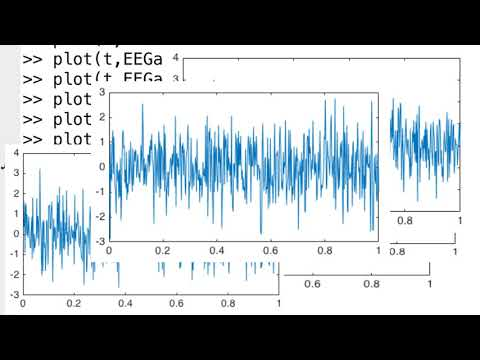

In [ ]:
YouTubeVideo('nandZ5aaRaQ') # https://www.youtube.com/watch?v=nandZ5aaRaQ

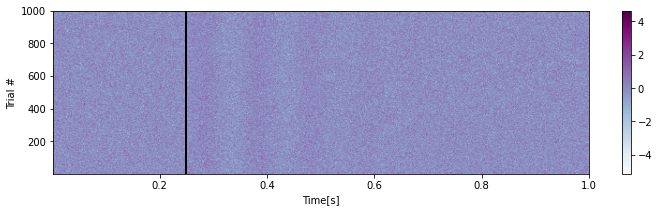

In [ ]:
imshow(EEGa,                                   # Image the data from condition A.
           cmap='BuPu',                            # ... set the colormap (optional)
           extent=[t[0], t[-1], 1, ntrials],       # ... set axis limits (t[-1] represents the last element of t)
           aspect='auto',                          # ... set aspect ratio 
           origin='lower')                         # ... put origin in lower left corner
xlabel('Time[s]')                              # Label the axes
ylabel('Trial #')
colorbar()                                     # Show voltage to color mapping
vlines(0.25, 1, 1000, 'k', lw=2)               # Indicate stimulus onset with line
show()


# Each row corresponds to a single trial of duration 1 s, and the color indicates the voltage, 
#with darker (lighter) colors indicating higher (lower) voltages. 
#This plot also indicates the time of stimulus presentation with a vertical black line as a cue to assist visual inspection.

# Plotting the ERP

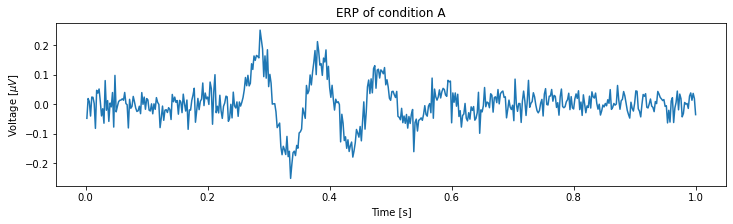

In [ ]:
# EEG data is noisy so we average out all the trials.

plot(t, EEGa.mean(0))        # Plot the ERP of condition A
xlabel('Time [s]')           # Label the axes
ylabel('Voltage [$\mu V$]')
title('ERP of condition A')  # ... provide a title
show()                       # ... and show the plot

# Confidence Intervals (method 1)





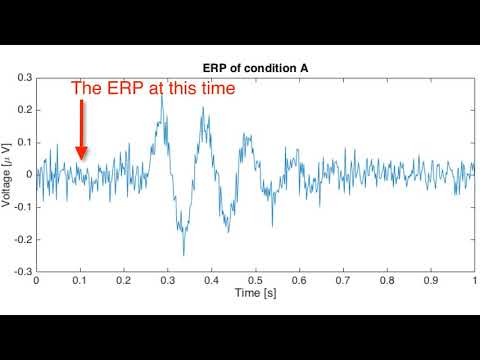

In [ ]:
YouTubeVideo('pXCJbyrw8Ug') # https://www.youtube.com/watch?v=pXCJbyrw8Ug&feature=emb_title

In [ ]:
mn = EEGa.mean(0)  # Compute the mean across trials (the ERP)
sd = EEGa.std(0)  # Compute the std across trials
sdmn = sd / sqrt(ntrials)  # Compute the std of the mean

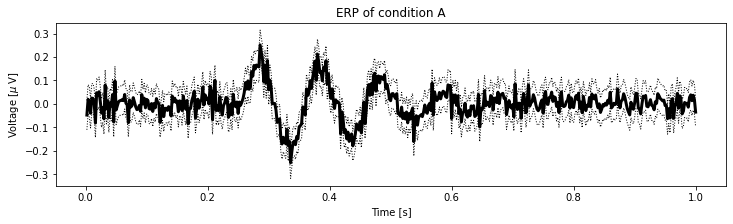

In [ ]:
fig, ax = subplots(figsize=(12, 3))    # Save the axes for use in later cells and resize the figure
ax.plot(t, mn, 'k', lw=3)              # Plot the ERP of condition A
ax.plot(t, mn + 2 * sdmn, 'k:', lw=1)  # ... and include the upper CI
ax.plot(t, mn - 2 * sdmn, 'k:', lw=1)  # ... and the lower CI
xlabel('Time [s]')                     # Label the axes
ylabel('Voltage [$\mu$ V]')
title('ERP of condition A')            # ... provide a useful title
fig                                    # ... and show the plot
show()

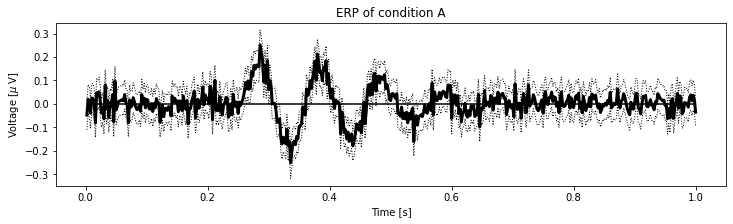

In [ ]:
ax.hlines(0, t[0], t[-1])
fig

In [ ]:
# We see that at 0.27 s, 0.37s, and at 0.47s there are confidence intervals that do not contain 0

In [ ]:
# Create a function to label plots
def labelPlot(title_string="Title"):
    '''
    A function that labels the x-axis as 'Time [s]' and
    the y-axis as 'Voltage [$\mu V$]'. 
    Arguments:
        title_string:  string variable to be used as
                       the plot title (default: 'Title')
                       
    '''
    xlabel('Time [s]')           # x-axis is time
    ylabel('Voltage [$/mu V$]')  # y-axis is voltage
    title(title_string)          # use the input here
    autoscale(tight=True)        # no white-space in plot

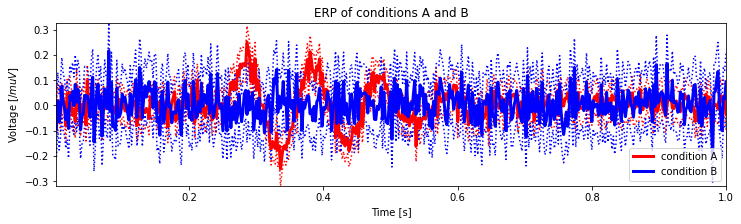

In [ ]:

erpA, ca_l, ca_h = ERP(data['EEGa'])  # Compute the ERP of condition A
erpB, cb_l, cb_h = ERP(data['EEGb'])  # ... and condition B

plot(t, ca_l, 'r:', t, ca_h, 'r:')    # Plot confidence bounds in back
plot(t, cb_l, 'b:', t, cb_h, 'b:')
plot(t, erpA, 'r', lw=3, label='condition A')  # ... and ERPs in front
plot(t, erpB, 'b', lw=3, label='condition B')

labelPlot('ERP of conditions A and B')# Label axes
legend()
show()

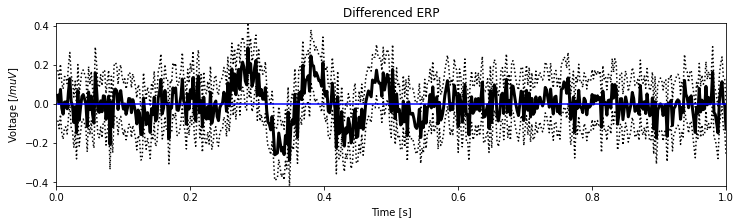

In [ ]:
# Differenced ERP

mnA = EEGa.mean(0)  # ERP of condition A
sdmnA = EEGa.std(0) / sqrt(ntrials)    # ... and standard dev of mean

mnB = EEGb.mean(0)  # ERP of condition B
sdmnB = EEGb.std(0) / sqrt(ntrials)    # ... and standard dev of mean

mnD = mnA - mnB     # Differenced ERP
sdmnD = sqrt(sdmnA ** 2 + sdmnB ** 2)  # ... and its standard dev

plot(t, mnD, 'k', lw=3)         # plot the differenced ERP
plot(t, mnD + 2 * sdmnD, 'k:')  # ... the upper CI
plot(t, mnD - 2 * sdmnD, 'k:')  # ... and the lower CI
plot([0, 1], [0, 0], 'b')       # ... and a horizontal line at 0
labelPlot('Differenced ERP')    # label the plot
show()

# Confidence Intervals for the ERP (Method 2)

### Steps:

1. Sample with replacement 1,000 trials of the EEG data from condition A.
2. Average these 1,000 trials to create a resampled ERP.
3. Repeat these two steps 3,000 times to create a distribution of ERPs.
4. For each time point, identify the values greater than 2.5% and less than 97.5% of all 3,000 values. This range determines the 95% confidence interval for the ERP for that time point.

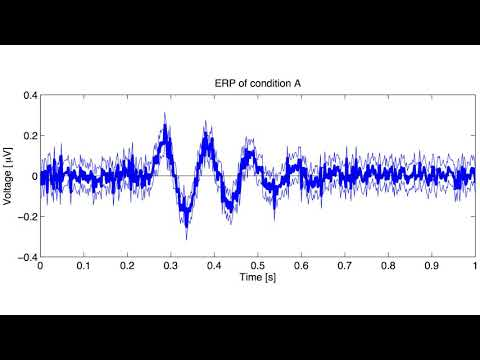

In [ ]:
# Bootstrap method 

YouTubeVideo('vVXH4XsPFEs') # https://www.youtube.com/watch?v=vVXH4XsPFEs



In [ ]:
# Draw 1000 integers with replacement from [0, 1000)
i = randint(0, ntrials, size=ntrials)

In [ ]:
EEG0 = EEGa[i]  # Create the resampled EEG.

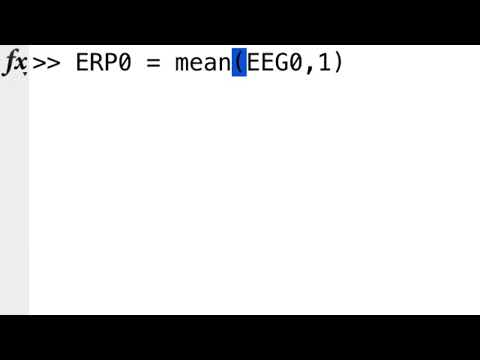

In [ ]:
# Step 2
YouTubeVideo('bUzuNojLUik') # https://youtu.be/bUzuNojLUik

In [ ]:
ERP0 = EEG0.mean(0)  # Create the resampled ERP

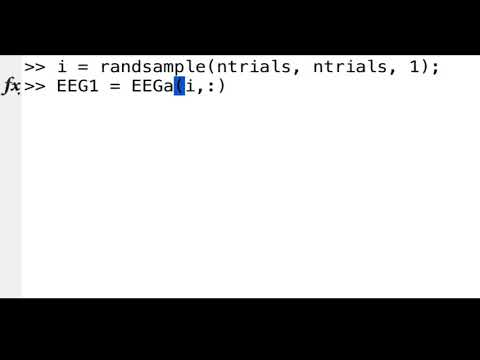

In [ ]:
# Step 3
YouTubeVideo('feQk_vKloXk') # https://youtu.be/feQk_vKloXk

In [ ]:
def bootstrapERP(EEGdata, size=None):  # Steps 1-2
    """ Calculate bootstrap ERP from data (array type)"""
    ntrials = len(EEGdata)             # Get the number of trials
    if size == None:                   # Unless the size is specified,
        size = ntrials                 # ... choose ntrials
    i = randint(ntrials, size=size)    # ... draw random trials,
    EEG0 = EEGdata[i]                  # ... create resampled EEG,
    return EEG0.mean(0)                # ... return resampled ERP.
                                       # Step 3: Repeat 3000 times 
ERP0 = [bootstrapERP(EEGa) for _ in range(3000)]
ERP0 = array(ERP0)                     # ... and convert the result to an array

In [ ]:
import pandas as pd

df = pd.DataFrame(ERP0)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,-0.068519,0.006021,0.014881,-0.065538,0.006052,0.026043,-0.011147,-0.080168,0.065780,0.021118,0.100756,0.037925,-0.016678,0.048465,-0.030788,0.061028,0.015686,-0.019373,-0.064307,-0.015823,0.013795,0.085822,-0.056621,0.100477,-0.056455,0.051388,-0.000127,0.043392,0.018643,0.059133,0.009694,0.094816,0.066214,-0.029199,-0.012852,0.052171,0.026494,-0.005371,0.019422,-0.072961,...,0.023993,0.029696,-0.012153,-0.026461,-0.022444,-0.083108,0.012179,-0.025650,0.066586,0.035203,0.017776,0.027175,0.021804,0.031538,-0.002174,-0.024211,-0.056188,-0.062343,-0.091249,0.004815,-0.000792,-0.092464,-0.042421,0.049300,0.040297,0.025637,-0.002457,0.028323,-0.038060,-0.056598,0.043191,-0.023326,-0.002366,-0.058085,0.018189,0.051274,0.007928,-0.007030,0.027225,-0.063358
1,-0.037364,0.044312,-0.044619,-0.001312,0.059532,0.050361,0.051314,-0.047548,0.054491,0.058526,0.020781,-0.032199,-0.068622,-0.005870,-0.130677,0.119846,-0.057212,0.037561,-0.098555,-0.019229,-0.025408,0.060813,-0.074554,0.116243,0.022783,0.036620,0.003474,0.025018,0.085598,0.007654,-0.026454,-0.028077,-0.021229,-0.051223,-0.067510,0.049018,-0.018593,-0.008244,0.003999,-0.059039,...,-0.002070,-0.009385,-0.003066,-0.056519,-0.052211,-0.018123,0.019401,0.051650,0.076317,0.011616,-0.022009,-0.022715,0.044633,0.010593,-0.034610,0.009705,-0.066762,-0.007889,-0.045793,0.006687,0.052347,-0.097148,0.010247,0.038395,0.043135,-0.000758,0.029825,0.021693,-0.025423,-0.047236,-0.027651,-0.032494,0.003648,-0.036306,0.008597,0.051518,0.007709,0.059240,0.043894,-0.059744
2,-0.032385,-0.030562,-0.009416,-0.010484,-0.046988,0.023550,0.040944,-0.071916,0.024704,0.001110,0.006171,0.024062,-0.104423,0.017376,-0.072579,0.019195,0.007870,-0.004078,0.012330,-0.019230,0.020130,0.028783,-0.049454,0.095609,0.010377,-0.042315,0.030990,0.038144,0.034918,0.056770,-0.008529,0.027808,0.016909,0.008613,-0.101600,0.057987,0.011222,-0.004651,0.104456,0.021408,...,0.042562,0.015780,-0.001166,-0.020649,-0.015813,-0.025816,0.016752,-0.036487,-0.008993,0.038119,-0.017834,-0.012786,0.004283,0.046171,-0.029424,-0.001191,-0.088272,-0.073108,-0.080020,-0.006969,0.039146,-0.072905,-0.043889,0.010926,0.051097,-0.020793,0.029326,0.005043,-0.064574,-0.068592,0.007951,-0.022599,0.007297,-0.011981,0.045485,0.028759,-0.012294,0.043297,0.079176,-0.078232
3,-0.044016,0.005754,-0.033590,-0.000501,0.031911,0.010670,0.069305,-0.076170,0.060474,0.052934,0.094970,-0.027130,-0.068288,-0.048544,-0.082308,0.111142,-0.055978,0.010644,-0.023226,0.026130,-0.012599,0.006726,-0.066835,0.043063,-0.066097,0.002732,0.050148,0.062392,0.043958,0.025859,-0.076532,0.067129,0.036737,-0.001866,-0.072632,0.035488,-0.066219,-0.031429,0.009103,-0.001327,...,-0.059692,0.002339,-0.036853,-0.063413,-0.033433,-0.040777,-0.041679,-0.033019,0.061676,0.017938,-0.019654,-0.051803,0.032717,-0.024971,-0.085747,0.052504,-0.037752,-0.044502,-0.086816,-0.015019,0.036737,-0.054891,-0.056767,0.071153,0.054241,0.023295,0.063608,-0.013459,-0.005699,-0.099482,0.041029,0.028394,0.016207,-0.026779,-0.022549,0.048134,0.039819,0.001288,0.050928,-0.031223
4,-0.066177,0.036749,0.038403,-0.021512,0.029175,0.080330,0.017025,-0.015349,0.058610,0.066164,0.025687,0.059923,-0.025279,-0.018759,-0.111607,0.099586,0.010773,-0.019840,-0.061223,-0.061226,-0.061338,0.057357,-0.012702,0.082304,0.013464,-0.043433,0.040494,-0.021545,-0.007316,0.052496,0.034390,-0.047988,-0.058114,0.016419,-0.125070,0.057712,0.058032,-0.028041,0.041604,0.012574,...,0.021480,0.017533,0.047203,-0.051152,0.044042,-0.041139,0.008514,-0.001445,0.042889,0.067006,0.052459,0.027943,0.026897,0.010431,-0.067742,-0.005974,-0.097951,0.007109,-0.070716,0.016079,0.046626,-0.023040,0.025967,0.001840,0.027946,-0.052371,0.071126,0.019552,-0.070128,-0.05557

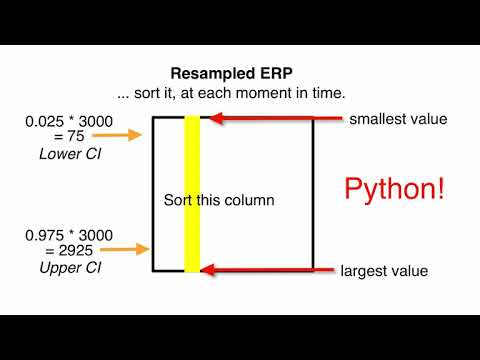

In [ ]:
# Step 4

YouTubeVideo('NLc93QESVZs') #https://youtu.be/NLc93QESVZs

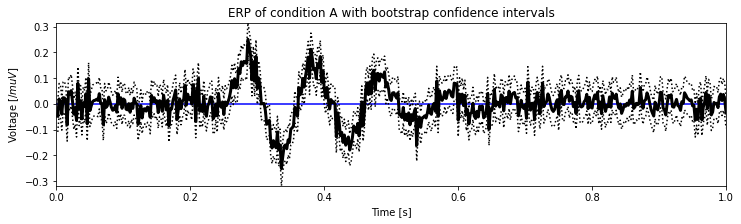

In [ ]:
ERP0.sort(axis=0)         # Sort each column of the resampled ERP
N = len(ERP0)             # Define the number of samples
ciL = ERP0[int(0.025*N)]  # Determine the lower CI
ciU = ERP0[int(0.975*N)]  # ... and the upper CI
mnA = EEGa.mean(0)        # Determine the ERP for condition A
plot(t, mnA, 'k', lw=3)   # ... and plot it
plot(t, ciL, 'k:')        # ... and plot the lower CI
plot(t, ciU, 'k:')        # ... and the upper CI
hlines(0, 0, 1, 'b')      # plot a horizontal line at 0
                          # ... and label the axes
labelPlot('ERP of condition A with bootstrap confidence intervals')  # We define this function above!

- The advantage of the bootstrapping procedure over other approaches is that this procedure requires few assumptions about the distribution of the statistic of interest, and that we use the observed data to probe the distribution of the statistic. 
- The disadvantage of the bootstrapping procedure is that it is computationally intensive. 
- Here we considered 3,000 resamplings, but we could easily consider more.

# A Bootstrap Test to Compare ERPs

### Steps

1. Merge the 1,000 trials each of EEG data from conditions A and B to form a combined distribution of 2,000 trials.
2. Sample with replacement 1,000 trials of EEG data from the combined distribution, and compute the resampled ERP.
3. Repeat step 2 and compute a second resampled ERP.
4. Compute the statistic, the maximum absolute value of the difference between the two resampled ERPs.
5. Repeat steps 2-4, 3,000 times to create a distribution of statistic values.
6. Compare the observed statistic to this distribution of statistic values. If the observed statistic is greater than 95% of the bootstrapped values, then reject the null hypothesis that the two conditions are the same.

In [ ]:
YouTubeVideo('K6pgCxFdELc') # https://youtu.be/K6pgCxFdELc

In [ ]:
mbA = mean(EEGa,0)          # Determine ERP for condition A
mnB = mean(EEGb,0)          # Determine ERP for condition B
mnD = mnA - mnB             # Compute the differenced ERP
stat = max(abs(mnD))        # Compute the statistic
print('stat = {:.4f} is the observed statistic'.format(stat))

stat = 0.2884 is the observed statistic


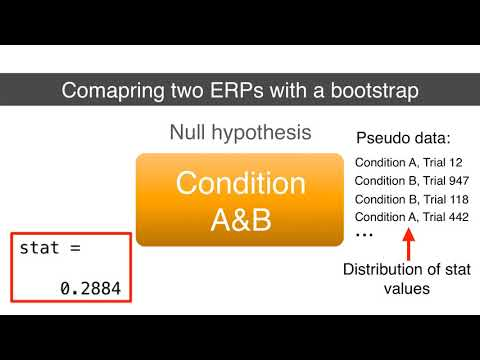

In [ ]:
YouTubeVideo('390ywma7S3U') #https://youtu.be/390ywma7S3U

In [ ]:
EEG = vstack((EEGa, EEGb))                # Step 1. Merge EEG data from all trials
seed(123)                                 # For reproducibility

def bootstrapStat(EEG):                   # Steps 2-4.
    mnA = bootstrapERP(EEG, size=ntrials) # Create resampled ERPa. The function 'bootstrapERP' is defined above!
    mnB = bootstrapERP(EEG, size=ntrials) # Create resampled ERPb
    mnD = mnA - mnB                       # Compute differenced ERP
    return max(abs(mnD))                  # Return the statistic
                                          # Resample 3,000 times
statD = [bootstrapStat(EEG) for _ in range(3000)]

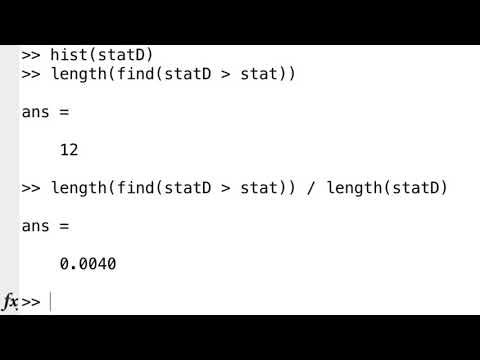

In [ ]:
YouTubeVideo('iefCPGHd5vY') # https://youtu.be/iefCPGHd5vY

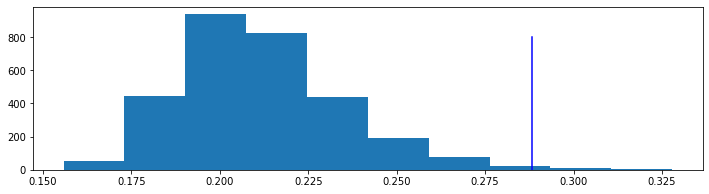

In [ ]:
hist(statD);
plot([0.2884, 0.2884], [0, 800], 'b')

# Observed value at blue vertical line and greater than 95% of all resampled data. Therefore, it is unlikely to have occured by chance. 
# A is significantly different than B. Reject null hypothesis. 

In [ ]:
# Further proof

print("Only " + str(sum(statD > stat)) + " of the resampled values are greater than the observed statistic.")

print(" ")

print("This means that only " + str(100*(18/3000))+ "% of resampled data is greater than the observed statistic")

Only 18 of the resampled values are greater than the observed statistic.
 
This means that only 0.6% of resampled data is greater than the observed statistic
